# Predicting Type-II Diabetes Occurrence Using Supervised Machine Learning

## Introduction

In this project, we will predict whether an individual is likely to be diabetic based on different variables, 
given below:

* gender
* age
* hypertension
* heart_disease,
* smoking_history
* bmi
* HbA1c_level
* blood_glucose_level
* diabetes

The dataset used was obtained from Kaggle: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/

Project by: Syed Muhammad Farzan Hussain (https://www.linkedin.com/in/farzanhussain/)

In [93]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_curve, confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score
from sklearn.datasets import make_classification

## Exploratory Data Analysis

In [61]:
# Loading the CSV file into Python and viewing the data
diabetes = pd.read_csv("diabetes_prediction_dataset.csv")
print(diabetes.head())

# Checking for null values
print(diabetes.isnull().sum())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


All null values in this dataset have been assigned a value of '0'. This can cause biases during calculations. Let's replace the values with NaN values instead. 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'heart_disease'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'HbA1c_level'}>,
        <AxesSubplot:title={'center':'blood_glucose_level'}>],
       [<AxesSubplot:title={'center':'diabetes'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

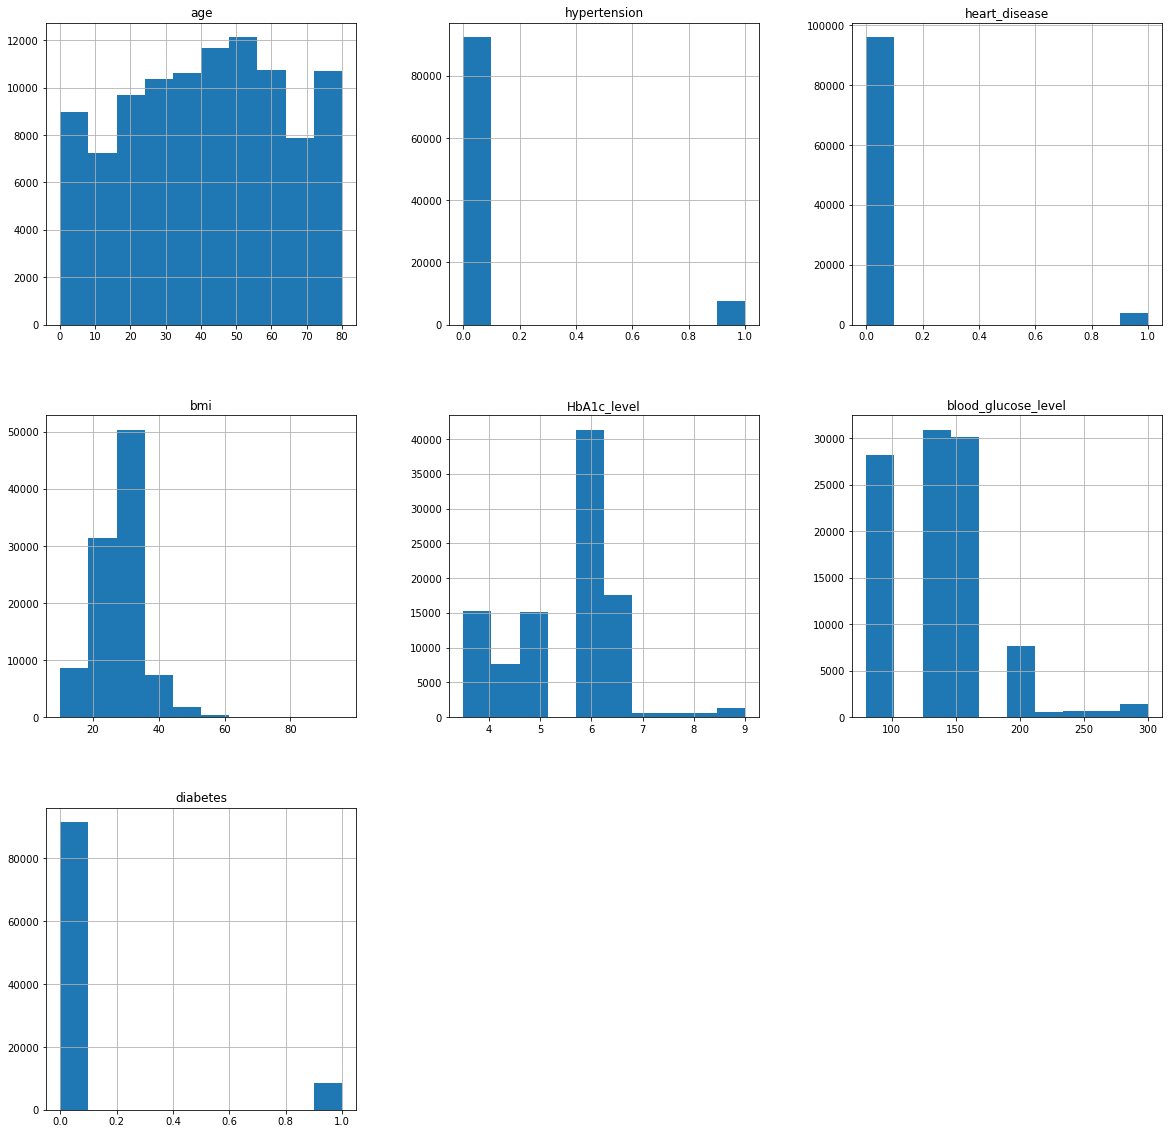

In [62]:
# Here's what the data looks like before replacing 0s with NaNs
diabetes.hist(figsize = (20,20))

[[<AxesSubplot:title={'center':'age'}>
  <AxesSubplot:title={'center':'hypertension'}>
  <AxesSubplot:title={'center':'heart_disease'}>]
 [<AxesSubplot:title={'center':'bmi'}>
  <AxesSubplot:title={'center':'HbA1c_level'}>
  <AxesSubplot:title={'center':'blood_glucose_level'}>]
 [<AxesSubplot:title={'center':'diabetes'}> <AxesSubplot:> <AxesSubplot:>]]
       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0            

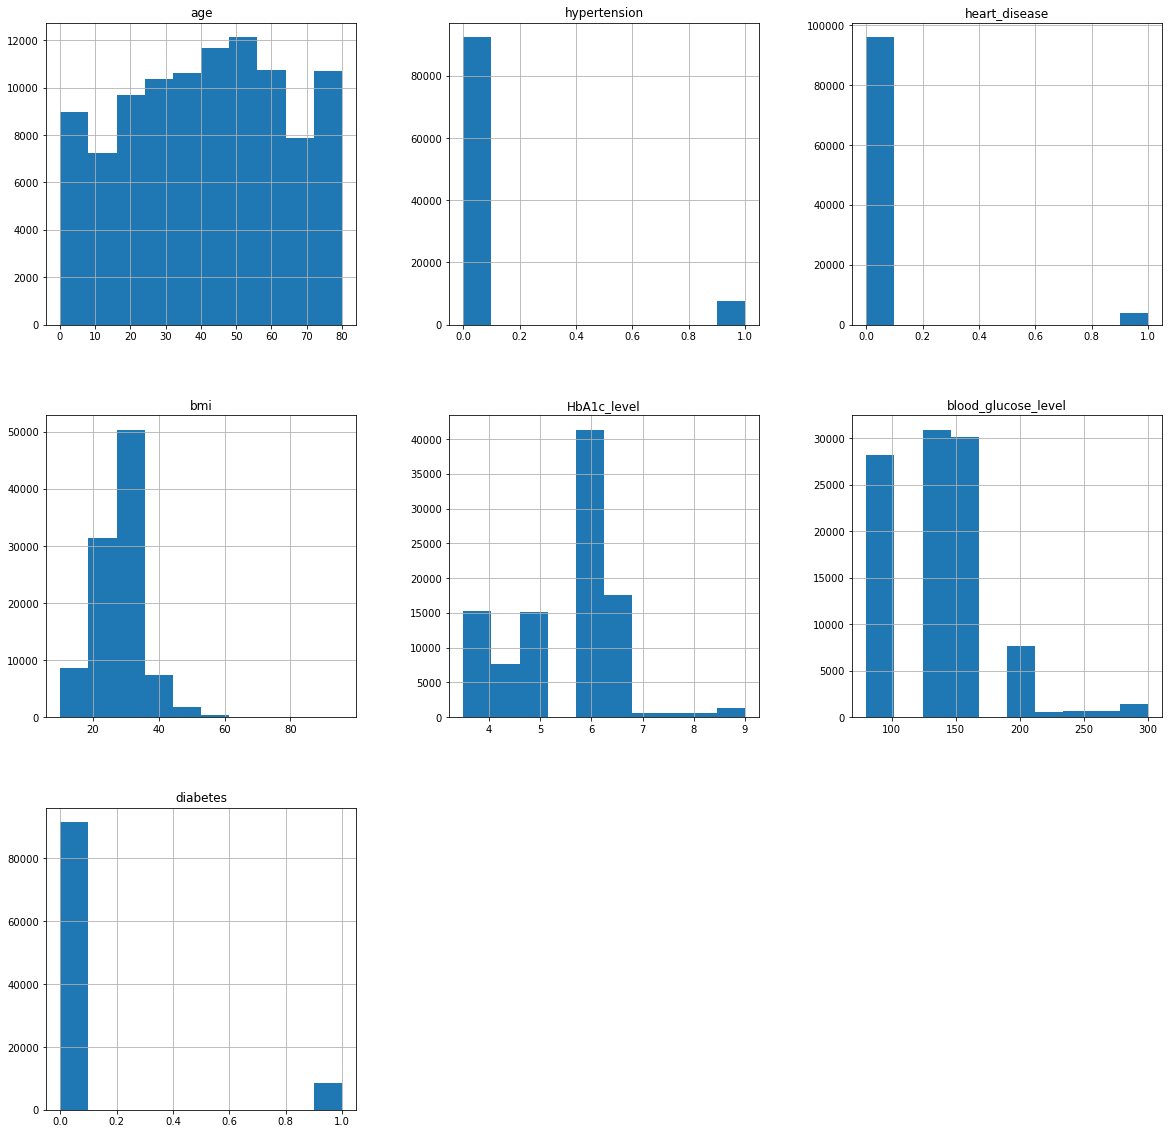

In [63]:
diabetes['age'].fillna(diabetes['age'].mean(), inplace = True)
diabetes['HbA1c_level'].fillna(diabetes['HbA1c_level'].mean(), inplace = True)
diabetes['blood_glucose_level'].fillna(diabetes['blood_glucose_level'].median(), inplace = True)
diabetes['bmi'].fillna(diabetes['bmi'].median(), inplace = True)

print(diabetes.hist(figsize = (20,20)))
print(diabetes)

In [64]:
# Let's see what variables we are working with
print(diabetes.head())

# Determining the dimensions of the dataframe
print(diabetes.shape)

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
(100000, 9)


In [65]:
# Replacing all categorical variables 
pd.unique(diabetes.smoking_history)
pd.unique(diabetes.gender)

# Defining a function to change strings to integers
def str_2_int(column):
    variables = pd.unique(diabetes[column])
    for item in range(variables.size):
        diabetes[column] = [item if each == variables[item] else each for each in diabetes[column]]
    return diabetes[column]

# Using the function to convert strings to integers
diabetes["gender"] = str_2_int("gender")
diabetes["smoking_history"] = str_2_int("smoking_history")
diabetes["gender"] = str_2_int("gender")

print(diabetes.head())

   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                0  25.19   
1       0  54.0             0              0                1  27.32   
2       1  28.0             0              0                0  27.32   
3       0  36.0             0              0                2  23.45   
4       1  76.0             1              1                2  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [66]:
# Getting the dataset's statistical information
diabetes.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414660,41.885856,0.07485,0.039420,1.306950,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,1.454501,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,2.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


<AxesSubplot:>

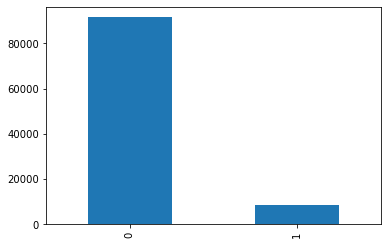

In [67]:
# How many people in the dataset have diabetes?
diabetes["diabetes"].value_counts()
diabetes.diabetes.value_counts().plot(kind="bar")

From the above vizualization, we can see that the data is imbalanced. There are more people who do not have diabetes in the dataset. 

In [68]:
diabetes.groupby("diabetes").mean()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,,,
0,0.409038,40.115187,0.058984,0.029235,1.281279,26.887163,5.396761,132.852470
1,0.475176,60.946588,0.245647,0.149059,1.583294,31.988382,6.934953,194.094706


The above table shows that people who have hypertenion, suffer from heart disease, have a high BMI, or have raised HbA1c and blood glucose levels are more prone to developing diabetes. 


<AxesSubplot:>

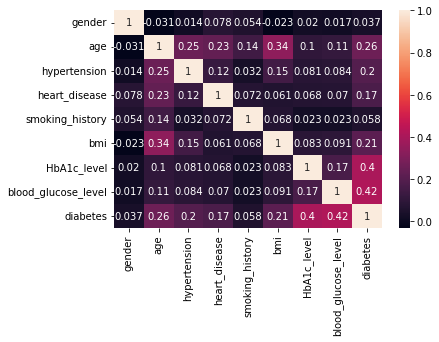

In [69]:
# Let's see the correlation between the variables
sns.heatmap(diabetes.corr(), annot = True)

The above correlation plot shows that blood glucose level, HbA1c level, and age are the most significant factors for causing diabetes in this dataset. 

We will also drop the following variables since they do not have a significant impact:
* smoking_history
* gender

In [70]:
diabetes = diabetes.drop(['smoking_history'], axis = 1)
diabetes = diabetes.drop(['gender'], axis = 1)
print(diabetes.head())

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  
0         0  
1         0  
2         0  
3         0  
4         0  


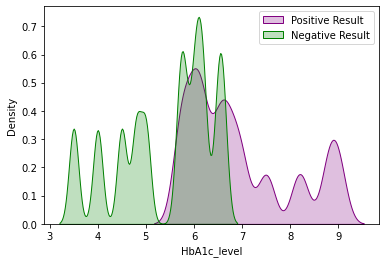

In [71]:
# How are diabetes and pregnancies related?
overlay = sns.kdeplot(diabetes["HbA1c_level"][diabetes["diabetes"] == 1], color = "Purple", shade = True) 
sns.kdeplot(diabetes["HbA1c_level"][diabetes["diabetes"] == 0], ax = overlay, color = "Green", shade= True)  
overlay.set_xlabel("HbA1c_level")  
overlay.set_ylabel("Density")  
overlay.legend(["Positive Result", "Negative Result"])  

After an HbA1c level of 7, all people in the dataset were diabetic. 

<AxesSubplot:xlabel='diabetes', ylabel='blood_glucose_level'>

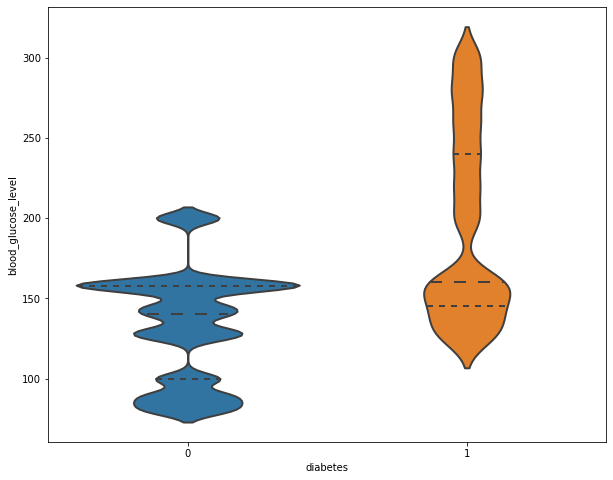

In [72]:
# How are glucose levels and diabetes related?
plt.figure(figsize = (10, 8))  
sns.violinplot(data = diabetes, x = "diabetes", y = "blood_glucose_level",  
               split = True, inner = "quart", linewidth = 2)  

As the glucose levels increase, there's a higher likelihood of a person developing diabetes. 

## Cleaning the Data

In [73]:
# Let's see if our data is standardized
print(diabetes.head)

<bound method NDFrame.head of         age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0             0              1  25.19          6.6   
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
4      76.0             1              1  20.14          4.8   
...     ...           ...            ...    ...          ...   
99995  80.0             0              0  27.32          6.2   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  diabetes  
0                      140         0  
1                       80         0  
2                      158         0  
3                      155         0  
4     

There's a large range of values in the data. We need to standardize it.

In [74]:
# Separating data and variables
X = diabetes.drop(columns = "diabetes", axis = 1)
y = diabetes["diabetes"]

# Since the ranges of the values spans across large values, we need to standardize the data
scaler = StandardScaler()

# Fitting data into the scaler
scaler.fit(X)
standardized_data = scaler.transform(X)

# Reassign X to represent the standardized data
X = standardized_data

In [75]:
# Splitting the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, stratify = y, random_state = 42)

# Let's see what X_train and X_test looks like
print(X_train.shape, X_test.shape)

(85000, 6) (15000, 6)


In [76]:
# Training the model
classifier = svm.SVC(kernel = "linear")

classifier.fit(X_train, y_train)

SVC(kernel='linear')

## Model Evaluation

In [84]:
# Is our model any good?
# Calculating model accuracy on training data
X_train_pred = classifier.predict(X_train)
X_train_acc = accuracy_score(X_train_pred, y_train)
print("The accuracy of the model for training data is " + str(X_train_acc*100) + " percent.")

The accuracy of the model for training data is 96.05294117647058 percent.


In [85]:
# Calculating model accuracy for test data
X_test_pred = classifier.predict(X_test)
X_test_acc = accuracy_score(X_test_pred, y_test)
print("The accuracy of the model for test data is " + str(X_test_acc*100) + " percent.")

The accuracy of the model for test data is 96.08666666666666 percent.


In [79]:
# Building a confusion matrix
my_matrix = confusion_matrix(y_test, X_test_pred)
print(my_matrix)

print("True Positives:", my_matrix[1,1])
print("True Negatives:", my_matrix[0,0])
print("False Positives:", my_matrix[0,1])
print("False Negatives:", my_matrix[1,0])

[[13652    73]
 [  514   761]]
True Positives: 761
True Negatives: 13652
False Positives: 73
False Negatives: 514


In [80]:
# Calculating other performance measures
print('Precision score:', precision_score(y_test, X_test_pred))
print('Recall score:', recall_score(y_test, X_test_pred))
print('Accuracy score:', accuracy_score(y_test, X_test_pred))
print('F1 score:', f1_score(y_test, X_test_pred))

Precision score: 0.9124700239808153
Recall score: 0.5968627450980392
Accuracy score: 0.9608666666666666
F1 score: 0.7216690374585112


In [91]:
# Generating the classification report
class_report = classification_report(y_test, X_test_pred)
print("Classification report: \n", class_report)

Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     13725
           1       0.91      0.60      0.72      1275

    accuracy                           0.96     15000
   macro avg       0.94      0.80      0.85     15000
weighted avg       0.96      0.96      0.96     15000



In [59]:
# Predictive model 
# We are selecting a random chain of input variables from the CSV file
input = [67.0,0,1,27.32,6.5,200]

# Changing the input into a numpy array
input_np = np.asarray(input)

# Reshaping the data
reshaped_input_np = input_np.reshape(1, -1)

# Standardize data
sd_data = scaler.transform(reshaped_input_np)

# Prediction
prediction = classifier.predict(sd_data)

if prediction == 1:
    print("The person is diabetic")
else:
    print("The person is not diabetic")

The person is diabetic


/Users/farzanhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
